In [4]:
import numpy as np

ModuleNotFoundError: No module named 'numpy'

In [ ]:
X = np.array([[1 , 2], [2 , 3] , [3 , 1] , [2 , 5] , [4 , 3]])
Y = np.array([1 , 1 , 1 , 0 , 0])

In [ ]:
X = np.hstack((np.ones((X.shape[0],1)),X))
X

array([[1., 1., 2.],
       [1., 2., 3.],
       [1., 3., 1.],
       [1., 2., 5.],
       [1., 4., 3.]])

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
def loss(theta):
    L = 0
    for x , y in zip(X , Y):
        if y == 0 :
            L -= -np.log(1 - sigmoid(np.dot(theta , x)))
        else :
             L -= -np.log(sigmoid(np.dot(theta , x)))
    return L / len(x)

loss(theta = [1 , 2 , 3])

np.float64(-12.666723204956805)

In [ ]:
def gradient(theta):
    G = 0
    for x , y in zip(X , Y):
        G += (sigmoid(np.dot(theta , x)) - y) * x
    return G / len(x)

gradient(theta = [1 , 2 , 3])

array([0.66661012, 1.99991289, 2.66656842])

In [ ]:
initial_theta = np.zeros(X.shape[1])
learning_rate = 0.1
tolerance = 1e-4
max_iters = 10_000

In [ ]:
k = 0 
theta = initial_theta
history_loss = [loss(theta)]
while True:
    k = k + 1
    theta = theta - learning_rate * gradient(theta)
    history_loss.append(loss(theta))
    if np.linalg.norm(gradient(theta)) < tolerance or k == max_iters:
        break

In [ ]:
max_iters

10000

In [ ]:
np.linalg.norm(gradient(theta))

np.float64(0.005707818472758197)

In [ ]:
a = -theta[1] / theta[2]
b = -theta[0] / theta[2]
a, b

(np.float64(-1.0318745767602782), np.float64(5.92376311674162))

In [ ]:
x_pred = np.array([1 ,1 , 4])
prob_pred = sigmoid(np.dot(theta ,x_pred))
prob_pred

np.float64(0.9482541915356452)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
y_pred = 1 if prob_pred >= 0.5 else 0

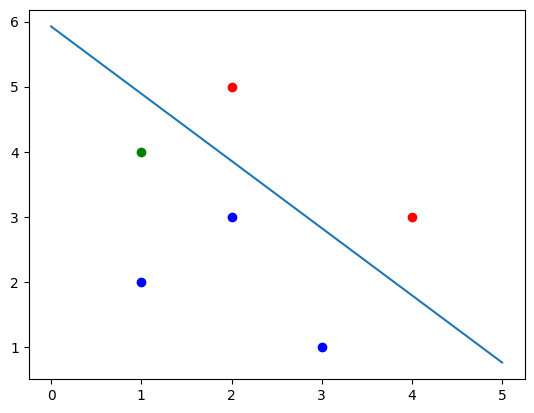

In [ ]:
plt.figure()
plt.scatter(X[Y == 1][: , 1] , X[Y == 1][: , 2], color= 'blue')
plt.scatter(X[Y == 0][: , 1] , X[Y == 0][: , 2], color= 'red')
X1 = np.linspace(0 ,5 ,100)
X2 = a * X1 + b
plt.plot(X1 , X2)
plt.scatter(x_pred[1],x_pred[2], color ='green')
plt.show()

In [ ]:
def Hess(theta):
    H = 0
    for x in X:
        s = sigmoid(np.dot(theta , x))
        H += s * (1 - s) * np.dot(np.expand_dims(x , axis = 1),np.expand_dims(x , axis = 0))
    return H / len(X)

In [ ]:
Hess([1 , 2 , 3])

array([[3.39247952e-05, 5.22589740e-05, 5.89410170e-05],
       [5.22589740e-05, 1.07103931e-04, 7.76277316e-05],
       [5.89410170e-05, 7.76277316e-05, 1.09317110e-04]])

In [ ]:
x = np.array([1 , 2 , 3])
np.expand_dims(x , axis = 1)

array([[1],
       [2],
       [3]])

In [ ]:
np.dot(np.expand_dims(x , axis = 1),np.expand_dims(x , axis = 0))

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

In [ ]:
k = 0 
theta = initial_theta
history_loss = [loss(theta)]
while True:
    k = k + 1
    theta -= np.dot(Hess(theta), gradient(theta))
    history_loss.append(loss(theta))
    if np.linalg.norm(gradient(theta)) < tolerance or k == max_iters:
        break

In [ ]:
history_loss

[np.float64(-1.1552453009332422),
 np.float64(-2.5580770359154794),
 np.float64(-2.048658568945513),
 np.float64(-8.480305354637222),
 np.float64(-8.462465502743294),
 np.float64(-8.444336895240285),
 np.float64(-8.425909931168318),
 np.float64(-8.4071745209837),
 np.float64(-8.388120052793498),
 np.float64(-8.368735355620869),
 np.float64(-8.349008659382283),
 np.float64(-8.32892755121701),
 np.float64(-8.308478927762573),
 np.float64(-8.287648942916109),
 np.float64(-8.266422950559418),
 np.float64(-8.244785441653802),
 np.float64(-8.222719975027305),
 np.float64(-8.200209101080185),
 np.float64(-8.17723427752109),
 np.float64(-8.153775776114218),
 np.float64(-8.129812579262051),
 np.float64(-8.10532226506523),
 np.float64(-8.080280879284514),
 np.float64(-8.054662792373033),
 np.float64(-8.028440539441169),
 np.float64(-8.001584640650936),
 np.float64(-7.974063399098061),
 np.float64(-7.945842672711226),
 np.float64(-7.916885616058008),
 np.float64(-7.887152387168551),
 np.float64(-